In [204]:
import os
import pandas as pd
import tensorflow
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed


from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json


data_dir = 'D:\\Projects\\AI-ML\\NASA-BEARING_Vibration\\2nd_test'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    #print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    #dataset_mean_abs.index = [filename]
    dataset_mean_abs['date'] = pd.to_datetime(filename, format='%Y.%m.%d.%H.%M.%S')
    merged_data = merged_data.append(dataset_mean_abs)

num_cols = ['Bearing 1']
merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4', 'date']
merged_data.reset_index(drop=True, inplace=True)
#merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
#merged_data.index = pd.to_datetime(merged_data.index, format='UTC')
#merged_data = merged_data.sort_index()
merged_data.to_csv('merged_dataset_BearingTest_2.csv')
#merged_data.index.names = ['index']
merged_data.head()


,Bearing 1,Bearing 2,Bearing 3,Bearing 4,date
0,0.058333,0.071832,0.083242,0.043067,2004-02-12 10:32:39
1,0.058995,0.074006,0.084435,0.044541,2004-02-12 10:42:39
2,0.060236,0.074227,0.083926,0.044443,2004-02-12 10:52:39
3,0.061455,0.073844,0.084457,0.045081,2004-02-12 11:02:39
4,0.061361,0.075609,0.082837,0.045118,2004-02-12 11:12:39


(array([731624., 731625., 731626., 731627., 731628., 731629., 731630.]),
 <a list of 7 Text xticklabel objects>)

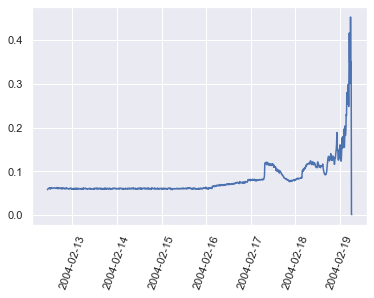

In [205]:

dataset_train = merged_data #['2004-02-12 11:02:39':'2004-02-13 23:52:39']
#dataset_test = merged_data['2004-02-13 23:52:39':]
#dataset_train.plot(merged_data.loc[:,"date"], merged_data.loc[:,"Bearing 1"], figsize = (12,6))
plt.plot(merged_data["date"], merged_data[num_cols])
plt.xticks(rotation=70)


In [206]:
dataset_train.loc[:,num_cols]

,Bearing 1
0,0.058333
1,0.058995
2,0.060236
3,0.061455
4,0.061361
...,...
979,0.453335
980,0.337583
981,0.351111
982,0.001857


In [213]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

#X = dataset_train.loc[:,1:4]
#X.plot(figsize = (12,6))

#plt.scatter(merged_data.index,X[:,1], label='True Position')

kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(dataset_train.loc[:,num_cols])
print(kmeans.cluster_centers_)




[[0.06159613]
 [0.11919813]
 [0.33527421]
 [0.08160921]
 [0.19564367]]


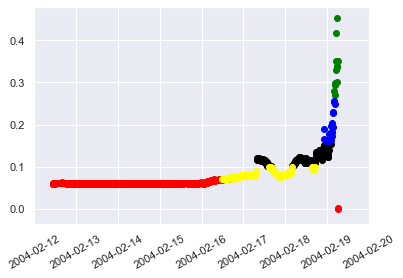

In [216]:
import datetime
# filtered_label1 = dataset_trainX[label == 0]
# # print(filtered_label1)
 
# filtered_label2 = dataset_trainX[label == 1]

# filtered_label3 = dataset_trainX[label == 2]

filtered_label1 = dataset_train.iloc[label==0,:]
# print(filtered_label1)
 
filtered_label2 = dataset_train.iloc[label==1,:]

filtered_label3 = dataset_train.iloc[label==2,:]

filtered_label4 = dataset_train.iloc[label==3,:]

filtered_label5 = dataset_train.iloc[label==4,:]

#Plotting the results
plt.scatter(filtered_label1['date'] ,filtered_label1["Bearing 1"] , color = 'red')
plt.scatter(filtered_label2['date'] , filtered_label2["Bearing 1"] , color = 'black')
plt.scatter(filtered_label3['date'] , filtered_label3["Bearing 1"] , color = 'green')
plt.scatter(filtered_label4['date'] , filtered_label4["Bearing 1"] , color = 'yellow')
plt.scatter(filtered_label5['date'] , filtered_label5["Bearing 1"] , color = 'blue')

left = datetime.date(2004, 2, 12)
right = datetime.date(2004, 2, 20)

#plt.gca().xaxis.set_major_formatter(filtered_label1['date'].DateFormatter('%m-%d')) 

# Change the tick interval
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30)) 

# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation = 30)  

# Changes x-axis range
plt.gca().set_xbound(left, right)
#plt.xticks(np.arange(pd.to_datetime("2004-02-01", utc=True), pd.to_datetime("2004-02-28", utc=True)))
plt.show()